<a href="https://colab.research.google.com/github/Janardhan2131/Sign-Language-Prediction/blob/main/Sign_Language_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sign Language Prediction

## Importing Libraries

In [92]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset

In [93]:
train_df = pd.read_csv("sign_mnist_train.csv")        # train dataset
test_df = pd.read_csv("sign_mnist_test.csv")          # test dataset

In [94]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Checking null values

In [95]:
train_df.isnull().sum().sum()

0

There are no null values

In [96]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In training set, there are 27455 rows and 785 columns

In [97]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In test set, there are 7172 rows and 785 columns

In [98]:
train_df.describe()     # summary statistics

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


### About Dataset

Basically in this dataset, there are 785 columns:



*   One column is 'label' for the corresponding gesture or sign image
*   Remaining 784 columns represent pixels values of the image


*   Training set contains 27455 images
*   Test set contains 7172 images







*  784 pixels means 28*28 image

Lets see what each image means



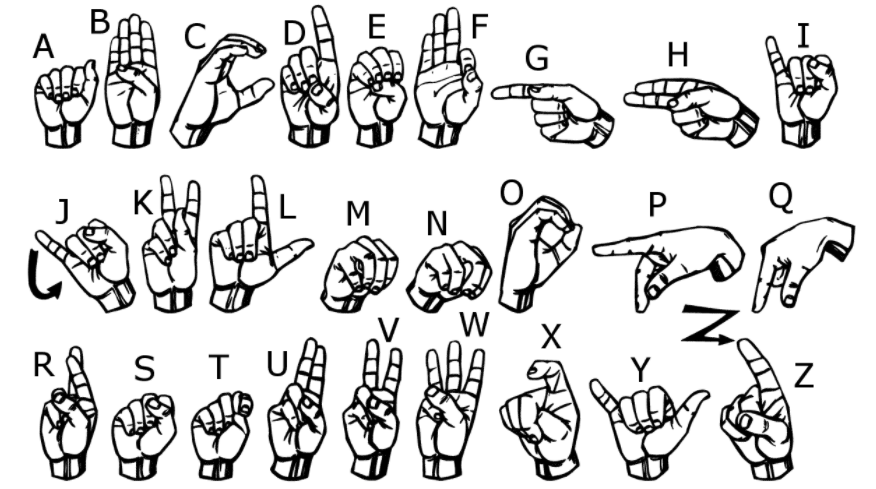

In [99]:
from PIL import Image
img = Image.open("american_sign_language.png")
img

## Data Preprocessing



*   Converting array to images (28 x 28)
*   Visualizing labels

*   One hot encoding on labels





In [100]:
y_train = train_df['label']
y_test = test_df['label']

x_train = train_df.drop(['label'],axis=1)
x_test = test_df.drop(['label'],axis=1)

del train_df['label']
del test_df['label']

### visualizing labels

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


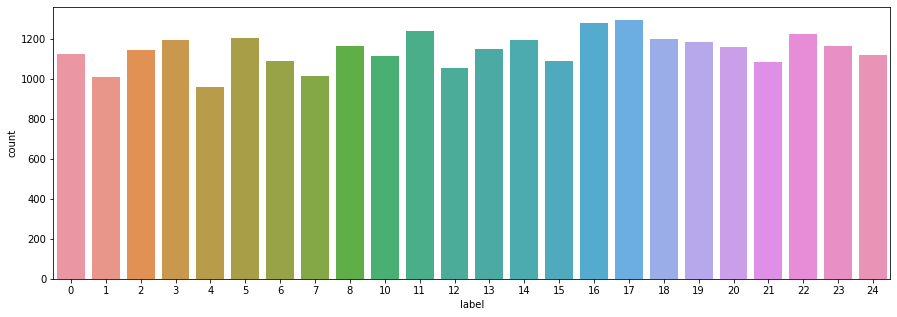

In [101]:
import seaborn as sns 

plt.figure(figsize=(15,5))
sns.countplot(y_train)

### Previewing Images

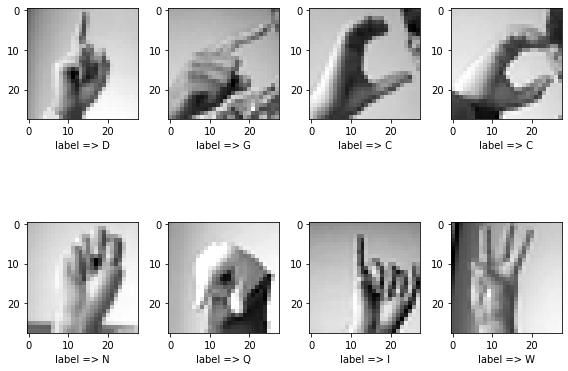

In [102]:
f, ax = plt.subplots(2,4)
f.set_size_inches(8,8)

k = 0
for i in range(2):
    for j in range(4):
        img = x_train.iloc[k].to_numpy()
        img = img.reshape((28,28))
        ax[i,j].set_xlabel("label => "+chr(y_train[k] + 65))
        ax[i,j].imshow(img,cmap='gray')
        k += 1
    plt.tight_layout()

### Label Encoding

Encode labels to one hot vectors like as follows


*   2 =>  [0,0,1,0,0,.....0,0]
*   4 =>  [0,0,0,0,1,.....0,0]





In [103]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [104]:
y_train[:2]

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]])

In [105]:
x_train = x_train.values
x_test = x_test.values

### Normalisation and Reshaping

we know that the pixel values lies between 0-255 but it is observed that model performs exceptionally well if we scale pixel values between 0-1 and CNN works faster

In [106]:
#Normalize the data

x_train = x_train/255
x_test = x_test/255

In [107]:
# Reshaping the data from 1-D to 3-D

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [108]:
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)

x_train shape:  (27455, 28, 28, 1)
x_test shape:  (7172, 28, 28, 1)


## Data Augmentation

In [109]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator

In [110]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [111]:
datagen.fit(x_train)

For the data augmentation , 

Randomly rotate some training images by 10 degrees, 
Randomly Zoom by 10% some training images, 
Randomly shift images horizontally by 10% of the width,
Randomly shift images vertically by 10% of the height,

 I did not apply a vertical_flip nor horizontal_flip since it could have lead to misclassify.

## Building the CNN model

In [112]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization

In [113]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 75)       300       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 75)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 50)      

In [114]:
from keras.callbacks import ReduceLROnPlateau
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [115]:
history = model.fit(datagen.flow(x_train,y_train,batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [lr_reduction])

Epoch 1/20
215/215 [==============================] - 110s 501ms/step - loss: 1.0272 - accuracy: 0.6793 - val_loss: 3.8540 - val_accuracy: 0.0743 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 105s 487ms/step - loss: 0.2071 - accuracy: 0.9318 - val_loss: 1.2922 - val_accuracy: 0.5693 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 107s 497ms/step - loss: 0.1008 - accuracy: 0.9680 - val_loss: 0.1285 - val_accuracy: 0.9678 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 104s 485ms/step - loss: 0.0639 - accuracy: 0.9799 - val_loss: 1.2306 - val_accuracy: 0.7025 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9873
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 [==============================] - 105s 490ms/step - loss: 0.0424 - accuracy: 0.9873 - val_loss: 0.2001 - val_accuracy: 0.9357 - lr: 0.0010
Epoch 6/20
215/215 [========================

## Analysis after training the model

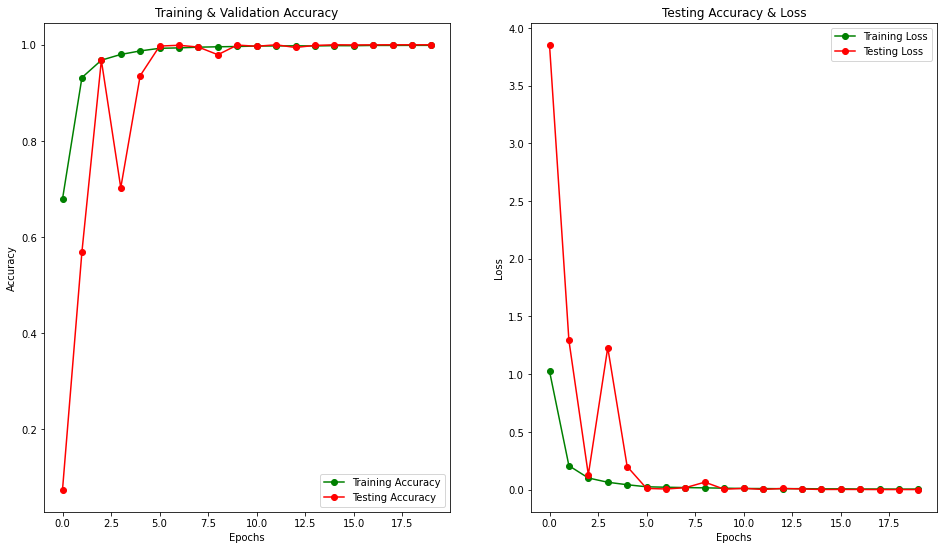

In [116]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

## Predicting the test set results

In [130]:
 y_pred = model.predict(x_test)

In [131]:
dataset = pd.read_csv("sign_mnist_train.csv")
unique_labels = dataset['label'].unique()
unique_labels = np.sort(unique_labels)
unique_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [132]:
def predictions_to_labels(pred):
    labels =[]
    for p in pred:
        labels.append(unique_labels[np.argmax(p)])
    return labels

In [133]:
y_pred_labels = predictions_to_labels(y_pred)
y_test_labels = predictions_to_labels(y_test)

In [139]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test_labels,y_pred_labels)
accuracy = accuracy_score(y_test_labels,y_pred_labels)
print("Accuracy : ",accuracy*100,"%")

Accuracy :  100.0 %


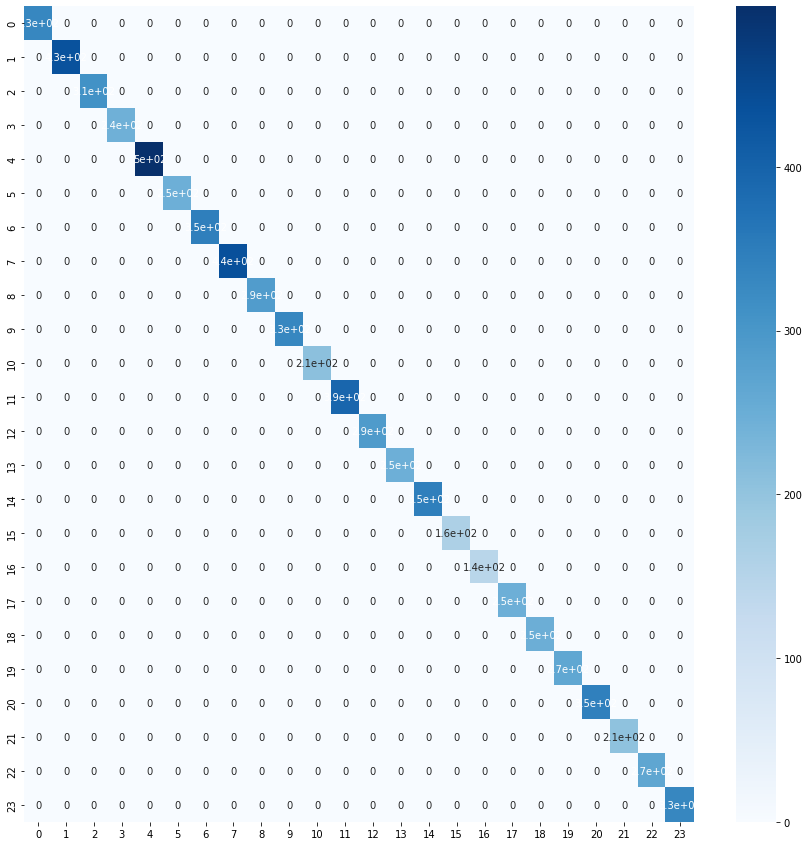

In [142]:
cm= confusion_matrix(y_test_labels,y_pred_labels)
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,cmap='Blues')

**Some correctly Predicted labels**

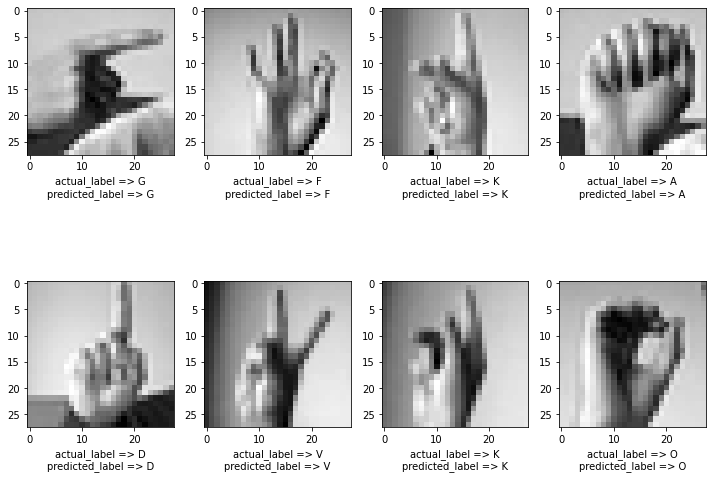

In [152]:
f, ax = plt.subplots(2,4)
f.set_size_inches(10,10)

k = 0
for i in range(2):
    for j in range(4):
        img = x_test[k]
        img = img.reshape((28,28))
        ax[i,j].set_xlabel("actual_label => "+chr(y_test_labels[k] + 65)+"\npredicted_label => "+chr(y_pred_labels[k] + 65))
        ax[i,j].imshow(img,cmap='gray')
        k += 1
    plt.tight_layout()